In [1]:
import mplhep as hep
import matplotlib.pyplot as plt
from wremnants.datasets.datagroups import datagroups2016
from wremnants import boostHistHelpers as hh
from wremnants import plot_tools,syst_tools
from wremnants import histselections as sel
import hist
import narf
import numpy as np
import logging

Welcome to JupyROOT 6.27/01


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
groups = datagroups2016("../mw_with_mu_eta_pt_pdfNNPDF31_scetlibCorr.pkl.lz4")


In [25]:
groups.results["WplusmunuPostVFP"]["output"].keys()

dict_keys(['scetlibCorr', 'pdfNNPDF31', 'alphaS002pdfNNPDF31', 'pdfCT18', 'alphaS002pdfCT18', 'pdfMMHT', 'alphaS002pdfMMHT', 'nominal', 'effStatTnP', 'effSystIsoTnP', 'muonL1PrefireStat', 'muonL1PrefireSyst', 'qcdScale', 'qcdScaleByHelicity', 'massWeight', 'muonScaleSyst', 'muonScaleSyst_responseWeights'])

(0.95, 1.05)

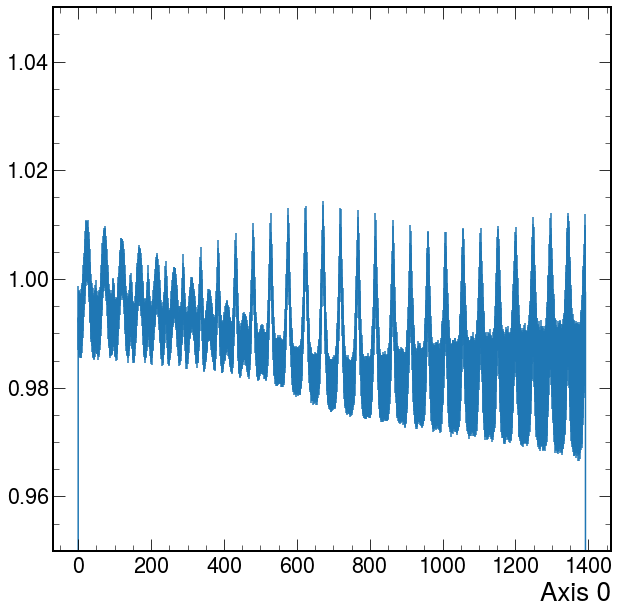

In [33]:
hh.divideHists(sel.unrolledHist(groups.results["WplusmunuPostVFP"]["output"]["pdfMMHT"][{"tensor_axis_0" : 0}]), sel.unrolledHist(groups.results["WplusmunuPostVFP"]["output"]["nominal"])).plot()
plt.ylim([0.95, 1.05])
                 

In [5]:
# This is for reading groups
groups.loadHistsForDatagroups("nominal", syst="", procsToRead=["Wmunu"])
groups.loadHistsForDatagroups("", syst="muonScaleSyst", procsToRead=["Wmunu"])
groups.loadHistsForDatagroups("", syst="muonScaleSyst_responseWeights", procsToRead=["Wmunu"])
histInfo = groups.getDatagroups()

In [6]:
# This is for reading groups
groups.loadHistsForDatagroups("nominal", syst="", procsToRead=["Wmunu"])
groups.loadHistsForDatagroups("", syst="qcdScaleByHelicity", procsToRead=["Wmunu"])
groups.loadHistsForDatagroups("", syst="pdfNNPDF31", procsToRead=["Wmunu"])
groups.loadHistsForDatagroups("", syst="pdfMMHT", procsToRead=["Wmunu"])
groups.loadHistsForDatagroups("", syst="pdfCT18", procsToRead=["Wmunu"])
histInfo = groups.getDatagroups()

In [7]:
histInfo["Wmunu"]["pdfCT18"]

Hist(
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge', label='charge'),
  Integer(0, 58, underflow=False, overflow=False, name='tensor_axis_0', label='tensor_axis_0'),
  storage=Weight()) # Sum: WeightedSum(value=5.59144e+09, variance=4.25693e+09) (WeightedSum(value=6.38455e+09, variance=4.81714e+09) with flow)

(0.95, 1.05)

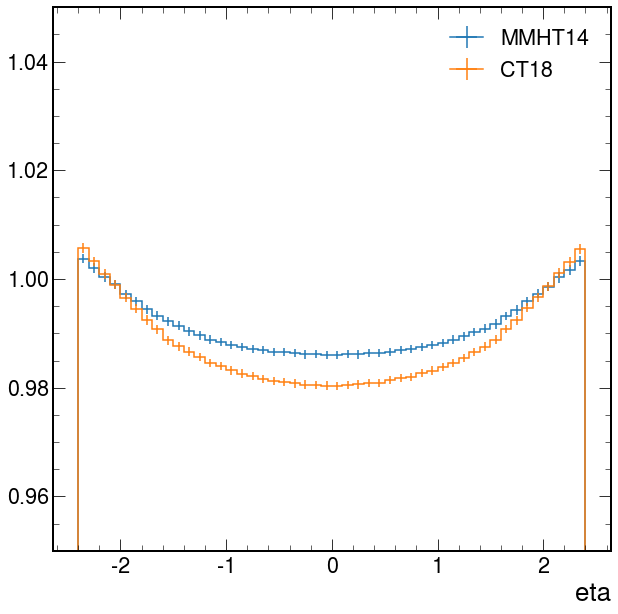

In [8]:
hh.divideHists(histInfo["Wmunu"]["pdfMMHT"][{"tensor_axis_0" : 0}].project("eta"), histInfo["Wmunu"]["nominal"].project("eta")).plot(label="MMHT14")
hh.divideHists(histInfo["Wmunu"]["pdfCT18"][{"tensor_axis_0" : 0}].project("eta"), histInfo["Wmunu"]["nominal"].project("eta")).plot(label="CT18")
plt.legend()
plt.ylim([0.95, 1.05])


(0.95, 1.05)

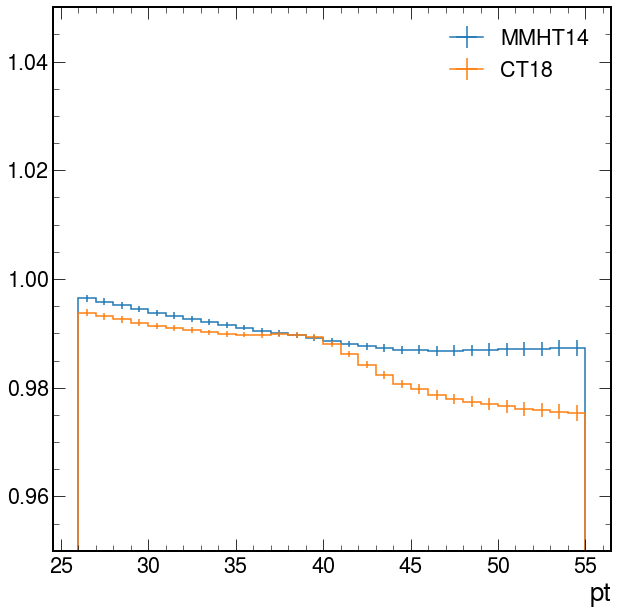

In [9]:
hh.divideHists(histInfo["Wmunu"]["pdfMMHT"][{"tensor_axis_0" : 0}].project("pt"), histInfo["Wmunu"]["nominal"].project("pt")).plot(label="MMHT14")
hh.divideHists(histInfo["Wmunu"]["pdfCT18"][{"tensor_axis_0" : 0}].project("pt"), histInfo["Wmunu"]["nominal"].project("pt")).plot(label="CT18")
plt.legend()
plt.ylim([0.95, 1.05])


In [10]:
hscaleUp = procDict["Wmunu"]["muonScaleSyst"][{"downUpVar" : 1, "scaleEtaSlice" : 1.j}]
hscaleDown = procDict["Wmunu"]["muonScaleSyst"][{"downUpVar" : 0, "scaleEtaSlice" : 1.j}]

NameError: name 'procDict' is not defined

In [ ]:
hnom = procDict["Wmunu"]["nominal"]
# Can also read specific samples by accessing the original 
hnomminus = groups.results["WminusmunuPostVFP"]["output"]["nominal"]

In [ ]:
hscaleUp.project("pt").plot()

In [ ]:
hh.divideHists(hscaleUp.project("pt"), hnom.project("pt")).plot()
hh.divideHists(hscaleDown.project("pt"), hnom.project("pt")).plot()
plt.ylim([0.995, 1.005])

In [11]:
combine = datagroups2016("../combineResults/Wmass/NoSysts/pdfNNPDF31_pseduoDataCT18/WMassCombineInput.root", combine=True)

In [12]:
combine.loadHistsForDatagroups("x", "nominal", channel="plus")
procs = combine.getDatagroups()
predictedProcs = [x for x in procs.keys() if x != "Data"]
combine.loadHistsForDatagroups("x", procsToRead=[x for x in procs.keys() if x != "Data"], syst="massShift100MeV", channel="plus")

In [13]:
combine.addSummedProc("x", name="massShift100MeVUp", histname="nominal", label="m$_{W} \pm 100$ MeV", procsToRead=predictedProcs, channel="plus", color="blue")
combine.addSummedProc("x", name="massShift100MeVDown", histname="nominal", label="", procsToRead=predictedProcs, channel="plus", color="blue")


In [14]:
combine.copyWithAction(lambda x: x, "Pseudodata", "Data", "nominal", "Pseduodata (CT18)")
procs["Pseudodata"]["nominal"] = combine.readHistCombine("pdfCT18", "sum", "", "plus", axisNames=["eta", "pt"])

IsData True
IsData False
IsData False


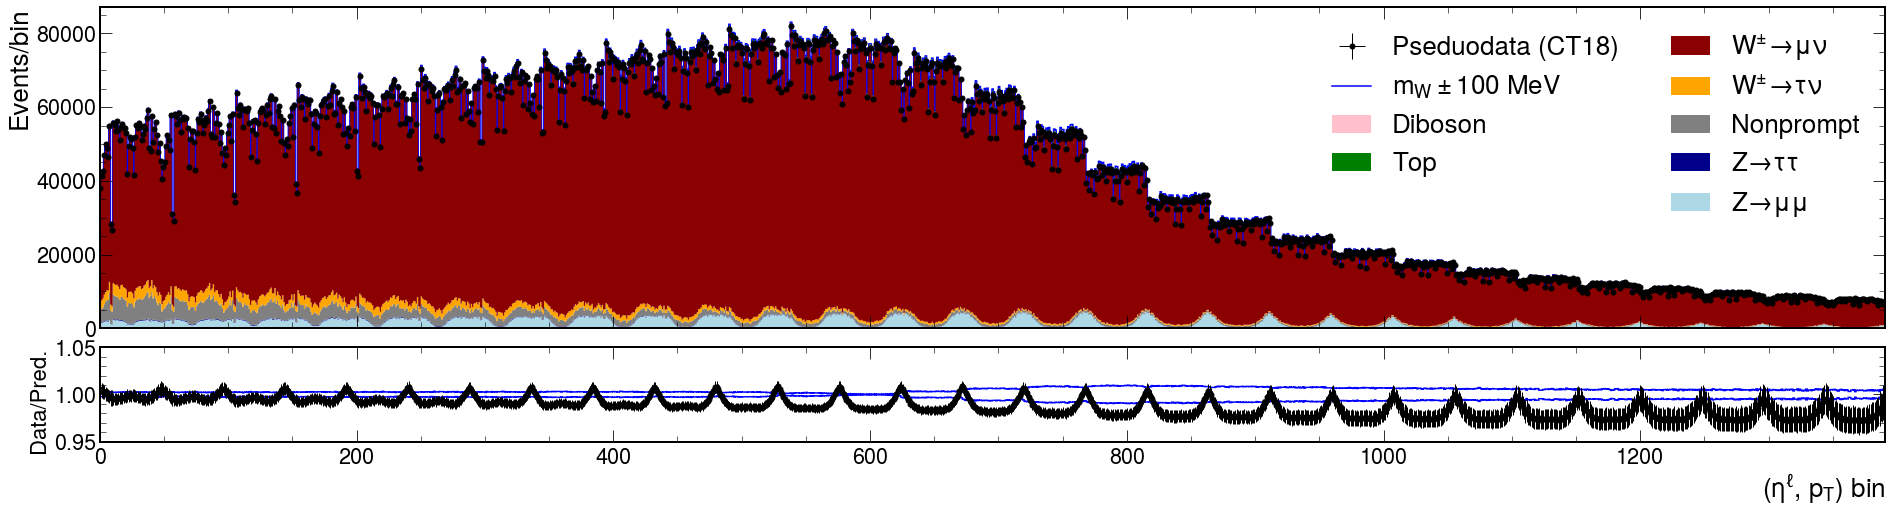

In [16]:
stacked = [x for x in procs.keys() if not any([y in x for y in ["Data", "massShift", "nominal", "Pseudodata"]])]
fig = plot_tools.makeStackPlotWithRatio(procs, stackedProcs=stacked, xlabel=r"($\eta^{\ell}$, p$_{\mathrm{T}}$) bin", action=sel.unrolledHist, unstacked=["Pseudodata", "massShift100MeVUp", "massShift100MeVDown",], rrange=[0.95, 1.05])

In [17]:
combine = datagroups2016("../combineResults/Wmass/NoSysts/pdfCT18_pseduoDataNNPDF31/WMassCombineInput.root", combine=True)

In [18]:
combine.loadHistsForDatagroups("x", "nominal", channel="plus")
procs = combine.getDatagroups()
predictedProcs = [x for x in procs.keys() if x != "Data"]
combine.loadHistsForDatagroups("x", procsToRead=[x for x in procs.keys() if x != "Data"], syst="massShift100MeV", channel="plus")

In [19]:
combine.addSummedProc("x", name="massShift100MeVUp", histname="nominal", label="m$_{W} \pm 100$ MeV", procsToRead=predictedProcs, channel="plus", color="blue")
combine.addSummedProc("x", name="massShift100MeVDown", histname="nominal", label="", procsToRead=predictedProcs, channel="plus", color="blue")

In [20]:
combine.copyWithAction(lambda x: x, "Pseudodata", "Data", "nominal", "Pseduodata (NNPDF3.1)")
procs["Pseudodata"]["nominal"] = combine.readHistCombine("pdfNNPDF31", "sum", "", "plus", axisNames=["eta", "pt"])

IsData True
IsData False
IsData False


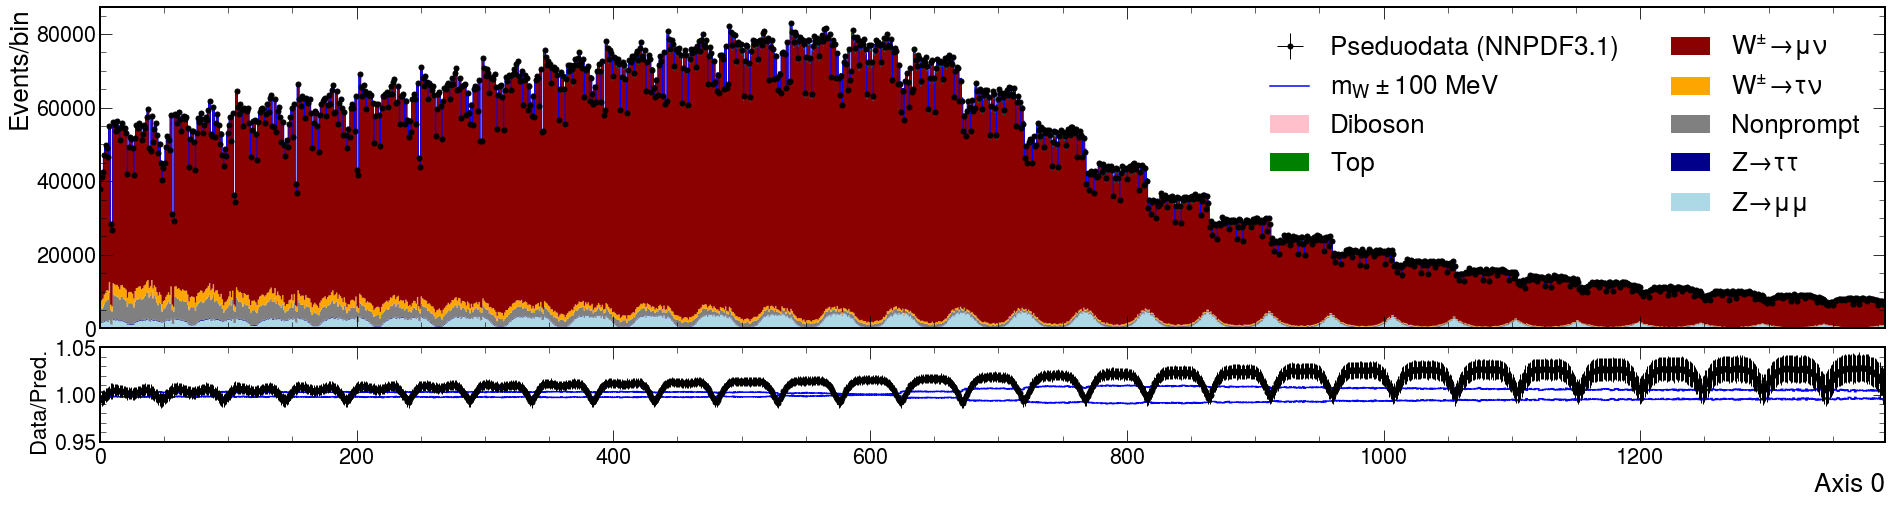

In [21]:
stacked = [x for x in procs.keys() if not any([y in x for y in ["Data", "massShift", "nominal", "Pseudodata"]])]
fig = plot_tools.makeStackPlotWithRatio(procs, stackedProcs=stacked, action=sel.unrolledHist, unstacked=["Pseudodata", "massShift100MeVUp", "massShift100MeVDown",], rrange=[0.95, 1.05])

IsData True
IsData False
IsData False


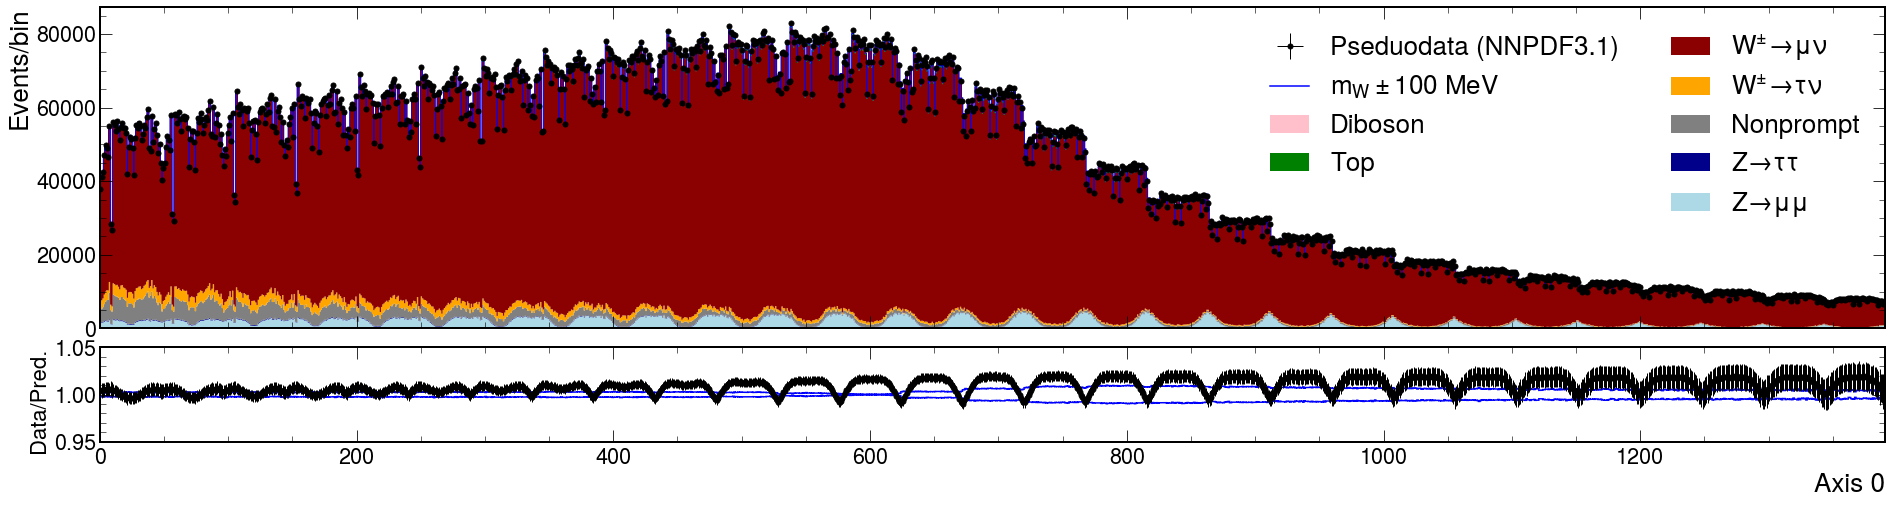

In [23]:
combine = datagroups2016("../combineResults/Wmass/NoSysts/pdfMMHT_pseduoDataNNPDF31/WMassCombineInput.root", combine=True)
combine.loadHistsForDatagroups("x", "nominal", channel="plus")
procs = combine.getDatagroups()
predictedProcs = [x for x in procs.keys() if x != "Data"]
combine.loadHistsForDatagroups("x", procsToRead=[x for x in procs.keys() if x != "Data"], syst="massShift100MeV", channel="plus")
combine.addSummedProc("x", name="massShift100MeVUp", histname="nominal", label="m$_{W} \pm 100$ MeV", procsToRead=predictedProcs, channel="plus", color="blue")
combine.addSummedProc("x", name="massShift100MeVDown", histname="nominal", label="", procsToRead=predictedProcs, channel="plus", color="blue")
combine.copyWithAction(lambda x: x, "Pseudodata", "Data", "nominal", "Pseduodata (NNPDF3.1)")
procs["Pseudodata"]["nominal"] = combine.readHistCombine("pdfNNPDF31", "sum", "", "plus", axisNames=["eta", "pt"])
stacked = [x for x in procs.keys() if not any([y in x for y in ["Data", "massShift", "nominal", "Pseudodata"]])]
fig = plot_tools.makeStackPlotWithRatio(procs, stackedProcs=stacked, action=sel.unrolledHist, unstacked=["Pseudodata", "massShift100MeVUp", "massShift100MeVDown",], rrange=[0.95, 1.05])

In [ ]:
groups.loadHistsForDatagroups("", syst="qcdScaleByHelicity", selectSignal=True, label="qcdScaleByHelicity", procsToRead=["Wmunu"], forceNonzero=False)

In [ ]:
histInfo["Wmunu"]["qcdScaleByHelicity"]

In [ ]:
histInfo["Wmunu"]["qcdScaleByHelicitySum"] = syst_tools.scale_helicity_hist_to_variations(histInfo["Wmunu"]["qcdScaleByHelicity"])

In [ ]:
s = hist.tag.Slicer()
hVarNom = histInfo["Wmunu"]["qcdScaleByHelicity"][{"ptVgen" : s[::hist.sum], "chargeVgen" : s[::hist.sum], "helicity" : s[::hist.sum], "muRfact" : s[1.j], "muFfact" : s[1.j] }]


In [ ]:
selections = [{"muRfact" : hist.loc(j), "muFfact" : hist.loc(j), "helicity" : i, "ptVgen" : 0, "chargeVgen" : -1j} for i in range(2) for j in [0.5,1.,2.]]
names = [f"muR{j}_muF{j}_hel_sigma{i}_ptVgen0_minus" for i in range(2) for j in [0.5,1.,2.]]

In [ ]:
hists = [sel.unrolledHist(histInfo["Wmunu"]["nominal"])]
hists.extend([sel.unrolledHist(histInfo["Wmunu"]["qcdScaleByHelicitySum"][s]) for s in selections])
labels = ["nominal"]+names
colors = ["black", "blue", "purple", "green", "pink", "orange", "lightblue"]

In [ ]:
hists = [histInfo["Wmunu"]["nominal"].project("pt")]
hists.extend([histInfo["Wmunu"]["qcdScaleByHelicitySum"][s].project("pt") for s in selections])

In [ ]:
fig = plot_tools.makePlotWithRatioToRef(hists, labels, colors, xlabel=r"p$_{T}$ (GeV)", ymax=3e7,rrange=[0.99, 1.01])

In [ ]:
selections = [{"muRfact" : 1.j, "muFfact" : 1.j, "helicity" : i} for i in range(9)]
#histInfo["Wmunu"]["qcdScaleByHelicity"] = syst_tools.scale_helicity_hist_to_variations(histInfo["Wmunu"]["qcdScaleByHelicity"], sum_ptV=True)
hists = [sel.unrolledHist(histInfo["Wmunu"]["nominal"])]
hists.extend([sel.unrolledHist(histInfo["Wmunu"]["qcdScaleByHelicity"][s]) for s in selections])
labels = ["nominal"]+[f"$sigma_{i-1}$*angular" if i != 0 else "$\sigma_\mathrm{UL}$" for i in range(9)]
colors = ["black", "blue", "purple", "green", "pink", "orange", "lightblue", "red", "lightgreen", "yellow"]
print(len(hists), len(labels), len(colors))
fig = plot_tools.makePlotWithRatioToRef(hists, labels, colors, xlabel=r"($\eta_{\ell}$, p$_{T}$) bin", ymax=8e6,rrange=[-0.2, 1.5])
fig.get_axes()[0].set_ylim([-1e4, 1.8e5])

In [ ]:
angular = [
    r"(1+\cos^{2}\theta)",
    r"(1-3\cos^{2}\theta)",
    r"\sin2\theta\cos\phi",
    r"\sin^{2}\theta",
    r"\sin\theta\cos\phi",
    r"\cos\phi",
    r"\sin^{2}\theta\sin2\theta",
    r"\sin2\theta\sin\phi",
    r"\sin\theta\sin\phi",
]

In [ ]:
selections = [{"muRfact" : 1.j, "muFfact" : 1.j, "helicity" : i} for i in range(9)]
#histInfo["Wmunu"]["qcdScaleByHelicity"] = syst_tools.scale_helicity_hist_to_variations(histInfo["Wmunu"]["qcdScaleByHelicity"], sum_ptV=True)
hists = [sel.unrolledHist(histInfo["Wmunu"]["nominal"])]
hists.extend([sel.unrolledHist(histInfo["Wmunu"]["qcdScaleByHelicity"][s]) for s in selections])
labels = ["nominal"]+["$\sigma_{%i}%s$" % (i-1, angular[i]) for i in range(0,9)]
colors = ["black", "blue", "purple", "green", "pink", "orange", "lightblue", "red", "lightgreen", "yellow"]
print(len(hists), len(labels), len(colors))
fig = plot_tools.makePlotWithRatioToRef(hists, labels, colors, xlabel=r"($\eta_{\ell}$, p$_{T}$) bin", ymax=8e6,rrange=[0.9, 1.1], rlabel="$x/\sigma_{total}$")
fig.get_axes()[0].set_ylim([-1e4, 1.8e5])

In [ ]:
selections = [{"muRfact" : 1.j, "muFfact" : 1.j, "helicity" : i} for i in range(9)]
hists = [sel.unrolledHist(histInfo["Wmunu"]["nominal"])]
hists.extend([sel.unrolledHist(histInfo["Wmunu"]["qcdScaleByHelicity"][s]) for s in selections])
labels = ["nominal"]+["$\sigma_{%i}%s$" % (i-1, angular[i]) for i in range(0,9)]
colors = ["black", "blue", "purple", "green", "pink", "orange", "lightblue", "red", "lightgreen", "yellow"]
print(len(hists), len(labels), len(colors))
fig = plot_tools.makePlotWithRatioToRef(hists, labels, colors, xlabel=r"($\eta_{\ell}$, p$_{T}$) bin", ymax=8e6,rrange=[-0.05, 0.1])
fig.get_axes()[0].set_ylim([-1e4, 1.8e5])

In [ ]:
histInfo["Wmunu"]["qcdScaleByHelicity"]

In [ ]:
histInfo["Wmunu"]["nominal"].project("pt").plot()
histInfo["Wmunu"]["qcdScaleByHelicity"][{"muRfact" : 1.j, "muFfact" : 1.j}].project("pt").plot()

In [ ]:
print(groups.results["WminusmunuPostVFP"]["output"]["nominal"].sum(flow=True))
print(groups.results["WminusmunuPostVFP"]["output"]["qcdScale"][{"muRfact" : 1.j, "muFfact" : 1.j}].sum(flow=True))


In [ ]:
groups.results["WminusmunuPostVFP"]["output"]["nominal"].project("pt").plot(label="nominal")
groups.results["WminusmunuPostVFP"]["output"]["qcdScaleByHelicity"][{"muRfact" : 1.j, "muFfact" : 1.j}].project("pt").plot()
plt.legend()

In [ ]:
groups.results["WplusmunuPostVFP"]["output"]["nominal"].project("pt").plot(label="nominal")
groups.results["WplusmunuPostVFP"]["output"]["qcdScaleByHelicity"][{"muRfact" : 1.j, "muFfact" : 1.j}].project("pt").plot()
plt.legend()

In [ ]:
groups.results["WminusmunuPostVFP"]["output"]["qcdScaleByHelicity"]

In [ ]:
#groups.results["WplusmunuPostVFP"]["output"]["qcdScaleByHelicity"]
groups.results["WminusmunuPostVFP"]["output"]["qcdScaleByHelicity"]

In [ ]:
orig = groups.results["WplusmunuPostVFP"]["output"]["qcdScaleByHelicity"].copy()
orig

In [ ]:
orig_sum = orig +  groups.results["WminusmunuPostVFP"]["output"]["qcdScaleByHelicity"]

In [ ]:
orig_sum.sum(flow=True)

In [ ]:
histInfo["Wmunu"]["qcdScaleByHelicity"]